In [160]:
# Importing Numpy and Pandas
import numpy as np
import pandas as pd

In [161]:
# Loading the .csv file to dataframe
uber = pd.read_csv('D:\\IIIT-B Data science Program\\module 2\\uber semand supply\\Uber Request Data.csv')

In [162]:
# Previw of the new dataframe created
uber.shape

(6745, 6)

In [163]:
#Statistical overviw of data before data cleaning
uber_df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [164]:
#                                                --  Data Cleaning --

In [165]:
# Dropping any duplicate data in Request ID as a request ID can only be unique
uber.drop_duplicates(subset=['Request id'], keep='first', inplace=True)

In [166]:
# Checking the types of colums in dataframe
uber.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [167]:
#Converting the request timestamp and drop timestamp to dattime column for further analysis
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'])
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'])

In [168]:
# Checking the types of colums in dataframe after conversion
uber.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

In [169]:
uber.shape

(6745, 6)

In [170]:
#Overview of null values in each columns
print(uber.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [171]:
# Finding the rows having NA values in the dataframe and getiing the row details associated
uber_na_df = uber[uber.isnull().any(axis=1)]

In [172]:
print(uber_na_df.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [173]:
#Count of N/A in the dataframe (Stored in separate dataframe to do further analysis)
uber_na_df['Request id'].count()

3914

In [174]:
# Data regarding for which statuses we got NA values
uber_na_df['Status'].unique()

array(['Cancelled', 'No Cars Available'], dtype=object)

In [175]:
#Inference : We have 3914 NAs in dropdate and drop time only when the Status is in ("Cancelled" Or "No Cars Available").
#As they seems to be logical we won't drop NAs from the original dataframe (uber_df) we will use for analysis.

In [176]:
# Calculating the null  values in the driver id and taking out the inference
uber_driver_na_df = uber_na_df[uber_na_df['Driver id'].isnull()]

In [177]:
uber_driver_na_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,2016-11-07 00:02:00,NaT
4096,1364,City,NaN,No Cars Available,2016-11-07 00:06:00,NaT
4097,1366,City,NaN,No Cars Available,2016-11-07 00:09:00,NaT
4098,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
4099,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaT


In [178]:
uber_driver_na_df['Status'].unique()

array(['No Cars Available'], dtype=object)

In [179]:
#Inference : We have 2650 NAs in driver id only when the Status is in  "No Cars Available".
#As they seems to be logical we won't drop NAs from the original dataframe (uber_df) we will use for analysis.

In [180]:
#                                       -- End Of Data Cleaning --

In [181]:
#                                           -- Data Analysis --

In [182]:
# Derived metrics from the date

# Splitting the timestamp colums into data and time separate columns
uber['Request date'] = uber['Request timestamp'].dt.date
uber['Request time'] = uber['Request timestamp'].dt.hour
uber['Drop date'] = uber['Drop timestamp'].dt.date
uber['Drop time'] = uber['Drop timestamp'].dt.hour

In [183]:
#Dropping the parent columns from the data frame
uber.drop('Request timestamp', axis=1, inplace=True)
uber.drop('Drop timestamp', axis=1, inplace=True)

In [184]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request date,Request time,Drop date,Drop time
0,619,Airport,1.0,Trip Completed,2016-11-07,11,2016-11-07,13.0
1,867,Airport,1.0,Trip Completed,2016-11-07,17,2016-11-07,18.0
2,1807,City,1.0,Trip Completed,2016-12-07,9,2016-12-07,9.0
3,2532,Airport,1.0,Trip Completed,2016-12-07,21,2016-12-07,22.0
4,3112,City,1.0,Trip Completed,2016-07-13,8,2016-07-13,9.0


In [185]:
#Importing matplotlib ans seaborn
import matplotlib.pyplot as plt
import seaborn as sns

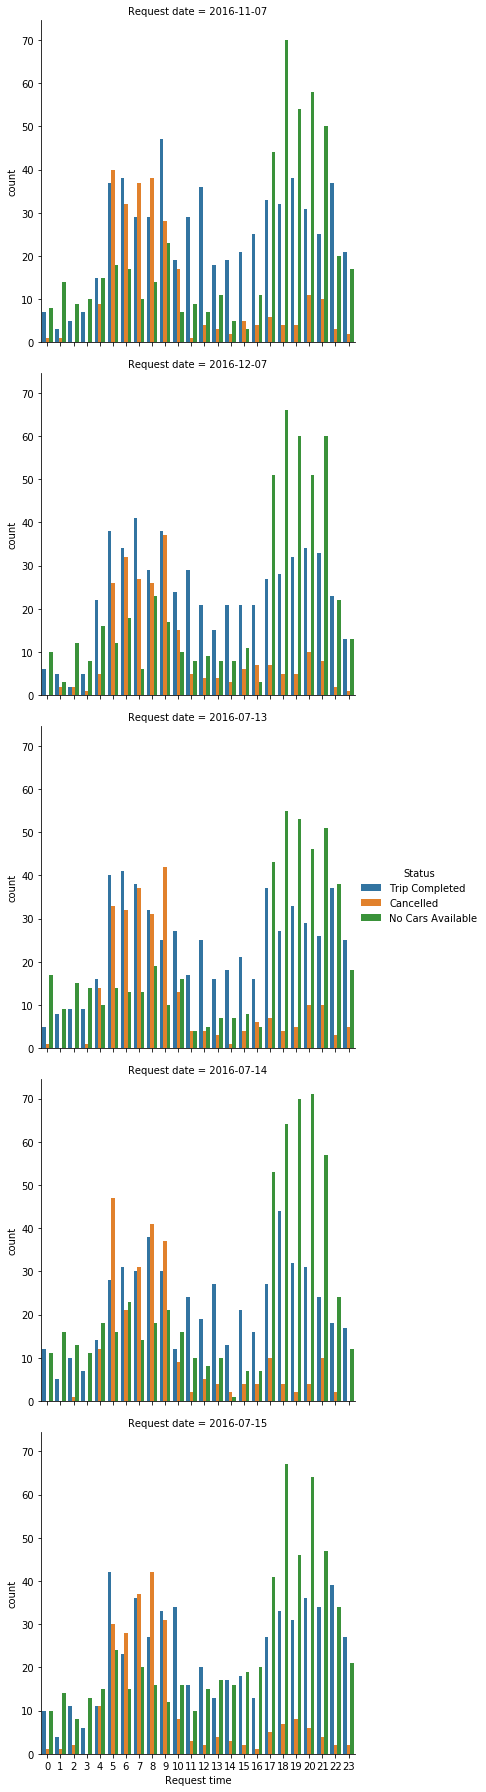

In [186]:
# Catplot is used as per the request time distribution for distinct days given in the data
sns.catplot(x = "Request time", hue = "Status", row = "Request date", data = uber, kind = "count")

In [187]:
# Inference :The cab request distribution is similar through out all the days 

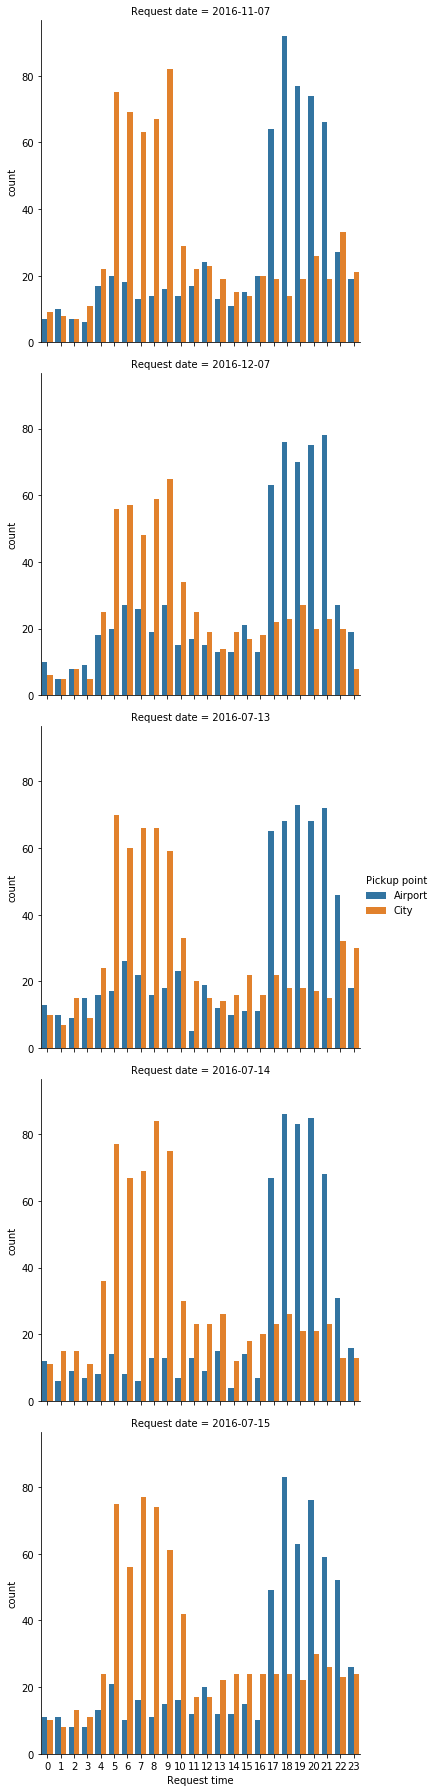

In [188]:
# Plot on the basis of the pick up point 
sns.catplot(x = "Request time", hue = "Pickup point", row = "Request date", data = uber,kind = "count")

In [189]:
# Function to create multiple segemnts of time with initial assumption 

def create_time_segment(x):
    if (x >= 2  and x < 6):
        return "Early Morning"
    elif (x >= 6  and x < 11):
        return "Morning Office"
    elif (x >= 11  and x < 18):
        return "Office time"
    elif (x >= 18  and x < 21):
        return "Evening traffic"
    else:
        return "High Night"

In [190]:
uber['Time Segment'] = uber["Request time"].apply(lambda x: create_time_segment(x))

In [191]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request date,Request time,Drop date,Drop time,Time Segment
0,619,Airport,1.0,Trip Completed,2016-11-07,11,2016-11-07,13.0,Office time
1,867,Airport,1.0,Trip Completed,2016-11-07,17,2016-11-07,18.0,Office time
2,1807,City,1.0,Trip Completed,2016-12-07,9,2016-12-07,9.0,Morning Office
3,2532,Airport,1.0,Trip Completed,2016-12-07,21,2016-12-07,22.0,High Night
4,3112,City,1.0,Trip Completed,2016-07-13,8,2016-07-13,9.0,Morning Office


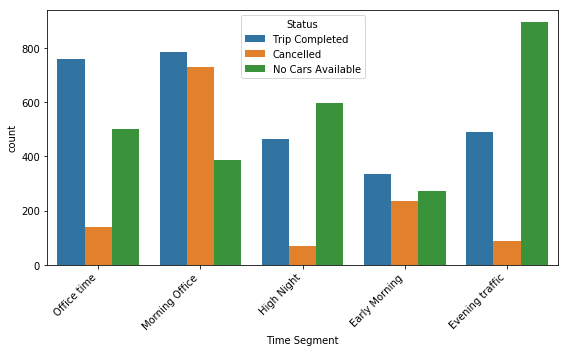

In [192]:
segment_plot = sns.countplot(x = 'Time Segment', hue = 'Status', data = uber)
segment_plot.set_xticklabels(segment_plot.get_xticklabels(), rotation=45, ha="right")
plt.rcParams["figure.figsize"] = (8, 5)
plt.tight_layout()
plt.show()

In [193]:
# Inference : Most number of cancellation occurs in Morning Office time (6 AM - 11 AM) 
# and car avaliability id very low at evening traffic (6 PM - 9 PM)

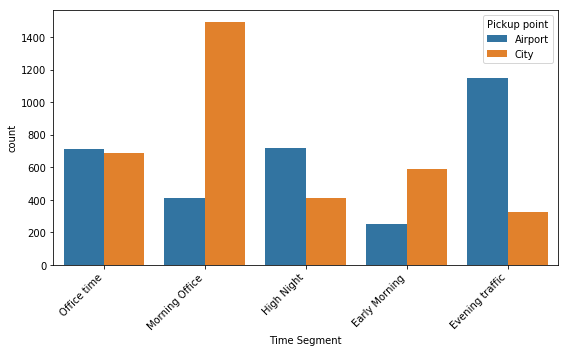

In [194]:
segment_plot = sns.countplot(x = 'Time Segment', hue = 'Pickup point', data = uber)
segment_plot.set_xticklabels(segment_plot.get_xticklabels(), rotation=45, ha="right")
plt.rcParams["figure.figsize"] = (8, 5)
plt.tight_layout()
plt.show()

In [195]:
# Inference : Maximun demand of cab in city is at Morning Office time where as for "Airport" pick up its Evening time

In [196]:
# Creation of df where status is cancelled only. 
uber_cancelled_df = uber[uber['Status'] == 'Cancelled']

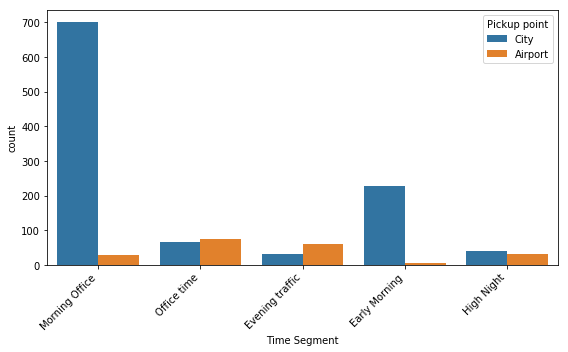

In [197]:
cancelled_cab_plot = sns.countplot(x = 'Time Segment', hue = 'Pickup point', data = uber_cancelled_df)
cancelled_cab_plot.set_xticklabels(cancelled_cab_plot.get_xticklabels(), rotation=45, ha="right")
plt.rcParams["figure.figsize"] = (8, 5)
plt.tight_layout()
plt.show()

In [198]:
# Inference : As shown earrlier maximun cancellation happened during Morning Office time in City

In [205]:
# Creation of df where status is cancelled only. 
uber_nonavaliable_df = uber[uber['Status'] == 'No Cars Available']

In [206]:
uber_nonavaliable_df.head()

,Request id,Pickup point,Driver id,Status,Request date,Request time,Drop date,Drop time,Time Segment
4095,1362,City,NaN,No Cars Available,2016-11-07,0,NaT,NaN,High Night
4096,1364,City,NaN,No Cars Available,2016-11-07,0,NaT,NaN,High Night
4097,1366,City,NaN,No Cars Available,2016-11-07,0,NaT,NaN,High Night
4098,2,Airport,NaN,No Cars Available,2016-11-07,0,NaT,NaN,High Night
4099,7,Airport,NaN,No Cars Available,2016-11-07,0,NaT,NaN,High Night


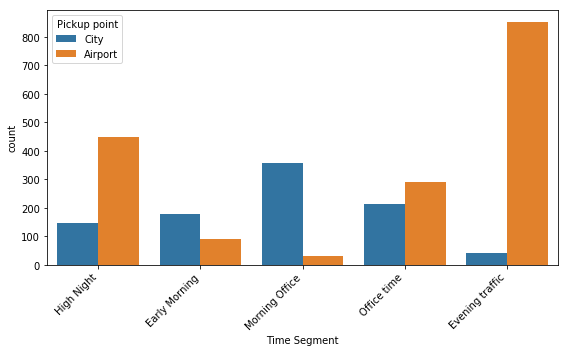

In [207]:
uber_nonavaliable_plot = sns.countplot(x = 'Time Segment', hue = 'Pickup point', data = uber_nonavaliable_df)
uber_nonavaliable_plot.set_xticklabels(uber_nonavaliable_plot.get_xticklabels(), rotation=45, ha="right")
plt.rcParams["figure.figsize"] = (8, 5)
plt.tight_layout()
plt.show()

In [208]:
# Inference : For the non avaliability the evening traffic time sees the maximum number of non availbility at the airport pickup

In [209]:
# So for the final supply demand analysis we need to consider two segments for both pickup points

# 1. Morning Office -- For City pickups
# 2. Evening Traffic -- For Airport pickups

In [210]:
# Morning Office Supply Demand Analysis

In [211]:
uber_morning_df = uber[uber['Time Segment'] == 'Morning Office']

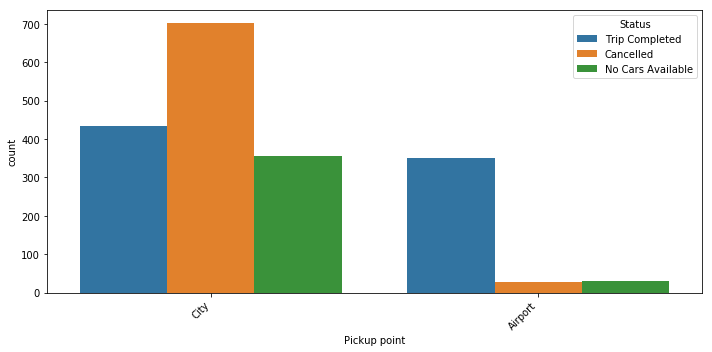

In [216]:
morning_segment_plot = sns.countplot(x = 'Pickup point', hue = 'Status', data = uber_morning_df)
morning_segment_plot.set_xticklabels(morning_segment_plot.get_xticklabels(), rotation=45, ha="right")
plt.rcParams["figure.figsize"] = (10, 5)
plt.tight_layout()
plt.show()

In [218]:
# Demand in Morning Office For City
Morning_demand_city = uber_morning_df.loc[(uber_morning_df["Pickup point"] == "City")]
print(len(Morning_demand_city))

1492


In [220]:
# Supply in Morning Office For City
Morning_supply_city = uber_morning_df.loc[(uber_morning_df["Pickup point"] == "City") & (uber_morning_df["Status"] == "Trip Completed")]
print(len(Morning_supply_city))

435


In [221]:
# Inference : In the morning office time when the demand at the city is high (1492) but the supply seems to be low like ( 435)

In [222]:
# Evening Supply Demand Analysis

In [223]:
uber_evening_df = uber[uber['Time Segment'] == 'Evening traffic']

In [224]:
uber_evening_df.shape

(1475, 9)

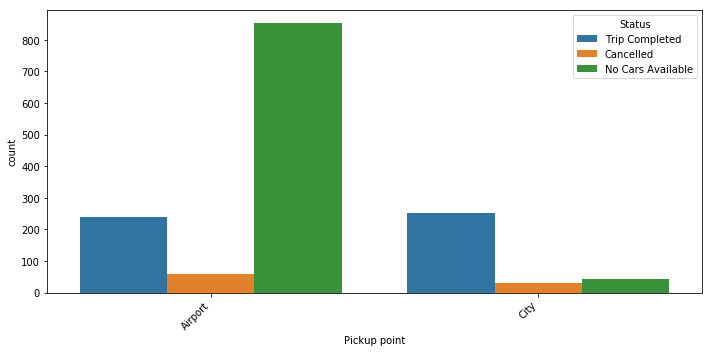

In [225]:
evening_segment_plot = sns.countplot(x = 'Pickup point', hue = 'Status', data = uber_evening_df)
evening_segment_plot.set_xticklabels(evening_segment_plot.get_xticklabels(), rotation=45, ha="right")
plt.rcParams["figure.figsize"] = (10, 5)
plt.tight_layout()
plt.show()

In [226]:
# Demand in Evening traffic For Airport  
Evening_demand_airport = uber_evening_df.loc[(uber_evening_df["Pickup point"] == "Airport")]
print(len(Evening_demand_airport))

1149


In [227]:
# Supply in Evening traffic For Airport  
Evening_supply_airport = uber_evening_df.loc[(uber_evening_df["Pickup point"] == "Airport") & (uber_evening_df["Status"] == "Trip Completed")]
print(len(Evening_supply_airport))

238


In [ ]:
#In the evening office time when the demand at the city is high  but the supply seems to be low like ( 238)